<h1>Crop Yield Prediction</h1>

Crop yield prediction is an important aspect of agriculture that helps farmers make informed decisions about their crops. In recent years, machine learning (ML) has emerged as a powerful tool for predicting crop yields.

The Agricultural yield primarily depends on weather conditions (rain, temperature, etc), pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions.

In this project the prediction of top 10 most consumed yields all over the world is established by applying machine learning techniques. It consist of 10 most consumed crops.

These crops include :

Cassava
Maize
Plantains and others
Potatoes
Rice, paddy
Sorghum
Soybeans
Sweet potatoes
Wheat
Yams

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filtering Warnings
import warnings
warnings.filterwarnings("ignore")

<h2>Gathering and Cleaning the data</h2>

### Crop Yield Data

In [2]:
df_yield = pd.read_csv("yield.csv")

In [3]:
df_yield.shape

(56717, 12)

In [4]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB


In [5]:
df_yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [6]:
df_yield["Domain Code"].nunique()

1

In [7]:
df_yield["Domain"].nunique()

1

In [8]:
df_yield["Area Code"].nunique()

212

In [9]:
df_yield["Area"].value_counts()

United Republic of Tanzania           560
Democratic Republic of the Congo      560
Nigeria                               560
Venezuela (Bolivarian Republic of)    532
Cameroon                              528
                                     ... 
Estonia                                50
Djibouti                               36
Sudan                                  35
Montenegro                             33
South Sudan                            20
Name: Area, Length: 212, dtype: int64

In [10]:
df_yield["Element Code"].nunique()

1

In [11]:
df_yield["Element"].value_counts()

Yield    56717
Name: Element, dtype: int64

In [12]:
df_yield["Item Code"].nunique()

10

In [13]:
df_yield["Item"].value_counts()

Maize                   8631
Potatoes                7876
Rice, paddy             6469
Sweet potatoes          6356
Wheat                   6160
Cassava                 5718
Sorghum                 5511
Soybeans                4192
Yams                    3150
Plantains and others    2654
Name: Item, dtype: int64

In [14]:
df_yield["Year Code"].nunique()

56

In [15]:
df_yield["Year"].value_counts()

2012    1112
2016    1111
2013    1111
2015    1108
2014    1108
2011    1107
2010    1106
2008    1104
2009    1103
2007    1102
2006    1100
2004    1097
2005    1096
2000    1095
2003    1094
2001    1094
2002    1093
1999    1088
1998    1087
1997    1087
1995    1085
1996    1083
1994    1079
1993    1075
1992    1066
1990     989
1991     987
1989     984
1988     976
1987     970
1986     970
1985     965
1984     960
1983     959
1982     957
1981     956
1980     956
1979     955
1978     954
1977     953
1976     951
1975     944
1974     941
1973     940
1972     937
1971     935
1970     929
1969     925
1968     924
1967     920
1966     919
1964     914
1963     914
1962     914
1965     914
1961     914
Name: Year, dtype: int64

In [16]:
df_yield["Unit"].nunique()

1

In [17]:
df_yield.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')

In [18]:
#Removing the unnecessary columns which doesn't give much information like 'Domain Code','Domain','Area Code','Element Code','Element','Item Code','Year Code','Unit'
df_yield = df_yield.drop(['Domain Code', 'Domain', 'Area Code','Element Code', 'Element','Item Code','Year Code','Unit'], axis=1)
df_yield.head()

,Area,Item,Year,Value
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [19]:
#Renaming the column value to yield production value ie hg/ha_yield
df_yield.rename(columns={'Value' : 'hg/ha_yield'}, inplace=True)
df_yield.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield'], dtype='object')

In [20]:
df_yield.describe()

,Year,hg/ha_yield
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [21]:
# From above we can infer that yield data is from year 1961 - 2016

### Rainfall Data

In [22]:
df_rainfall = pd.read_csv("rainfall.csv")
df_rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [23]:
df_rainfall.shape

(6727, 3)

In [24]:
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


In [25]:
#From above we infer that column 'average_rain_fall_mm_per_year' datatype is object, we should change to float 
#and it has some missing values

In [26]:
# Change datatype from object to float
df_rainfall['average_rain_fall_mm_per_year'] = pd.to_numeric(df_rainfall['average_rain_fall_mm_per_year'], errors='coerce')
df_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Area                          6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 157.8+ KB


In [27]:
df_rainfall['average_rain_fall_mm_per_year'].isnull().sum()

780

In [28]:
#Without rainfall info, empty rows of 'average_rain_fall_mm_per_year' doesnt't give any info. So deleting those empty rows
df_rainfall = df_rainfall.dropna()

In [29]:
df_rainfall.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [30]:
# From above we can infer that rainfall data if from year 1985-2017

In [31]:
# Rename column area in df_rainfall, since column name has space and we are not able to merge both dataframes.
df_rainfall.rename(columns={' Area' : 'Area'}, inplace=True)

In [32]:
# Merge yield data and rainfall data on year and area.
df_final = pd.merge(df_yield, df_rainfall, on=['Year','Area'])
df_final.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


In [33]:
df_final.shape

(25385, 5)

In [34]:
df_final.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


In [35]:
#From above we can infer that year started from 1985 even for yield data as rainfall data we have from 1985.

### Pesticides Data

In [36]:
df_pesticides = pd.read_csv("pesticides.csv")
df_pesticides.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [37]:
df_pesticides.shape

(4349, 7)

In [38]:
df_pesticides['Domain'].nunique()

1

In [39]:
df_pesticides['Area'].nunique()

168

In [40]:
df_pesticides['Element'].nunique()

1

In [41]:
df_pesticides['Item'].nunique()

1

In [42]:
df_pesticides['Year'].nunique()

27

In [43]:
df_pesticides['Unit'].nunique()

1

In [44]:
#Dropping unnecessary columns
df_pesticides = df_pesticides.drop(['Domain','Element','Item','Unit'], axis=1)
df_pesticides.head()

,Area,Year,Value
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [45]:
#Renaming the column Value to pesticides_tonnes
df_pesticides.rename(columns={'Value' : 'Pesticides_tonnes'}, inplace=True)
df_pesticides.columns

Index(['Area', 'Year', 'Pesticides_tonnes'], dtype='object')

In [46]:
df_pesticides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   Pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.1+ KB


In [47]:
df_pesticides.describe()

,Year,Pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [48]:
#From above we can infer that we have pesticides data from 1990 - 2016

In [49]:
#Merge the pesticides data with already merged yield and rainfall data on Year and Area
df_final = pd.merge(df_final, df_pesticides, on=['Year','Area'])
df_final.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,Pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


In [50]:
df_final.shape

(18949, 6)

In [51]:
df_final.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,Pesticides_tonnes
count,18949.000000,18949.000000,18949.000000,18949.000000
mean,2003.216001,71857.501821,1204.523722,12755.735231
std,7.895764,79684.570814,784.739435,33005.731790
min,1990.000000,50.000000,51.000000,0.000000
25%,1996.000000,18003.000000,600.000000,154.270000
50%,2004.000000,39602.000000,1113.000000,1578.000000
75%,2010.000000,99290.000000,1705.000000,9830.720000
max,2016.000000,554855.000000,3240.000000,395646.000000


In [52]:
# From above we can infer that data is from year 1990 -2016, since pesticides data is from 1990

### Temperature Data

In [53]:
df_temp = pd.read_csv("temp.csv")
df_temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [54]:
df_temp.shape

(71311, 3)

In [55]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [56]:
#avg_temp has null values
df_temp['avg_temp'].isnull().sum()

2547

In [57]:
#Deleting the null values
df_temp = df_temp.dropna()
df_temp.shape

(68764, 3)

In [58]:
#Renaming the columns year and country
df_temp.rename(columns={'year' : 'Year', 'country' : 'Area'}, inplace=True)
df_temp.columns

Index(['Year', 'Area', 'avg_temp'], dtype='object')

In [59]:
df_temp.describe()

,Year,avg_temp
count,68764.000000,68764.000000
mean,1908.742423,16.183876
std,66.060692,7.592960
min,1743.000000,-14.350000
25%,1862.000000,9.750000
50%,1914.000000,16.140000
75%,1964.000000,23.762500
max,2013.000000,30.730000


In [60]:
#From above we can infer that temperature data is from 1743 - 2013

In [61]:
# Merge the temperature data with already merged yield,rainfall and pesticides data on year and area
df_final = pd.merge(df_final, df_temp, on=['Year', 'Area'])
df_final.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,Pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [62]:
df_final.shape

(28242, 7)

In [63]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   Pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [64]:
df_final.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
Pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [65]:
df_final.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,Pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [66]:
#df_final is final all merged data. Data is from 1990 - 2013.

### Data Exploration

In [67]:
df_final.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,Pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [68]:
df_final.groupby('Item').count()

,Area,Year,hg/ha_yield,average_rain_fall_mm_per_year,Pesticides_tonnes,avg_temp
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [69]:
df_final['Area'].nunique()

101

In [70]:
# Top 10 highest yielding countries
df_final.groupby('Area', sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

In [71]:
# India is the highest yielding country

In [72]:
# Top 10 highest yielding Crops
df_final.groupby('Item', sort=True)['hg/ha_yield'].sum().nlargest(10)

Item
Potatoes                854351426
Sweet potatoes          344077024
Cassava                 307730510
Maize                   149633801
Rice, paddy             137994713
Wheat                   116158445
Yams                     96676873
Plantains and others     58958974
Sorghum                  56634127
Soybeans                 53924312
Name: hg/ha_yield, dtype: int64

In [73]:
# Potatoes is the highest yielding crop

In [74]:
# Group Item and Area yield production
df_final.groupby(['Item','Area'], sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

In [75]:
#1. India is highest production in Cassava and potatoes
#2. Potatoes are dominating crops in the dataset. and are the highest production crop in 4 countries.
#3. Data is about 101 countries spanning 23 years from 1990-2013

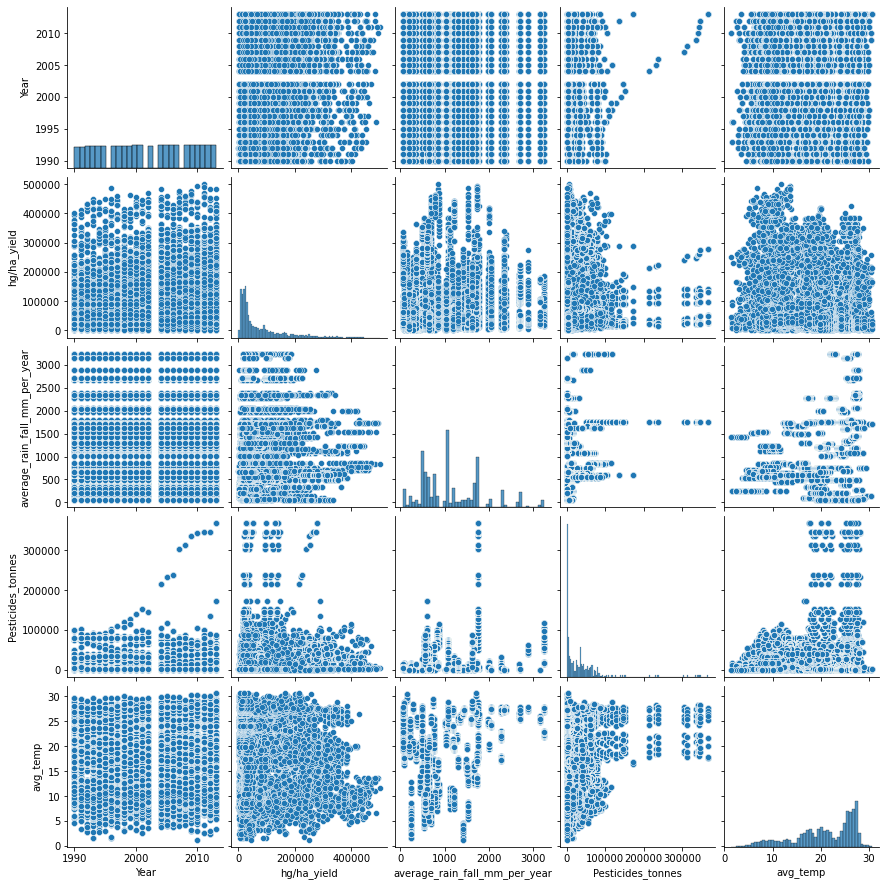

In [76]:
# Checking pairplot between columns
import seaborn as sns

sns.pairplot(df_final)

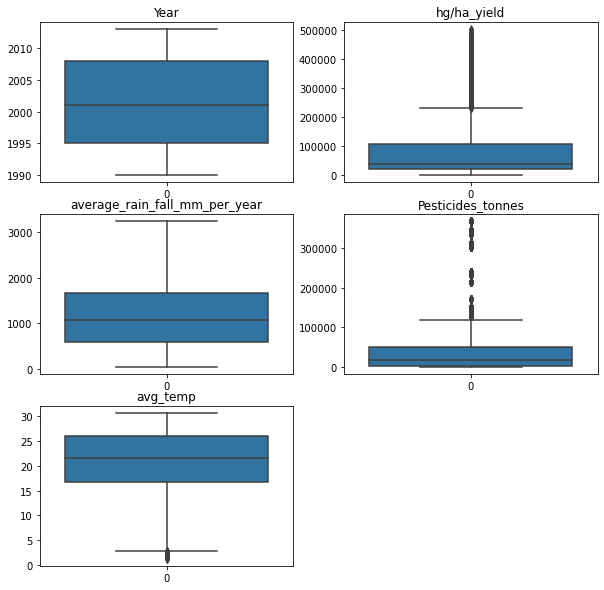

In [77]:
# Checking for outliers

plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(data= df_final['Year'])
plt.title('Year')


plt.subplot(3,2,2)
sns.boxplot(data= df_final['hg/ha_yield'])
plt.title('hg/ha_yield')

plt.subplot(3,2,3)
sns.boxplot(data= df_final['average_rain_fall_mm_per_year'])
plt.title('average_rain_fall_mm_per_year')

plt.subplot(3,2,4)
sns.boxplot(data= df_final['Pesticides_tonnes'])
plt.title('Pesticides_tonnes')

plt.subplot(3,2,5)
sns.boxplot(data= df_final['avg_temp'])
plt.title('avg_temp')

plt.show()


In [78]:
# There are outliers in Pesticides_tonnes, avg_temp

<AxesSubplot:>

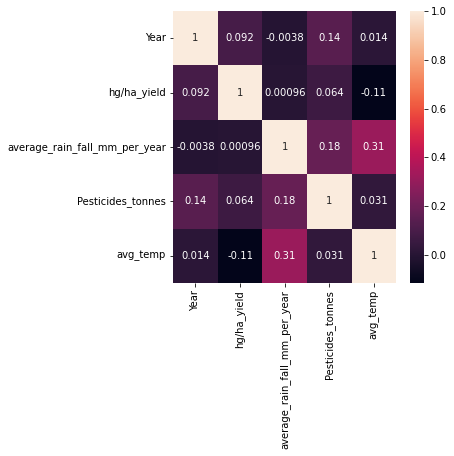

In [79]:
#Correlation between the columns

corr = df_final.corr()
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True)

In [80]:
# From above we can infer that there is no significant correlation between columns

<AxesSubplot:xlabel='Year', ylabel='Count'>

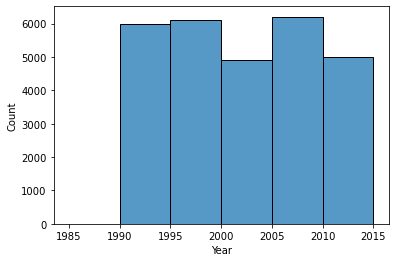

In [81]:
## Checking the data distribution in the year
sns.histplot(df_final, x = 'Year' , bins = range(1985, 2020, 5))

<AxesSubplot:xlabel='hg/ha_yield', ylabel='Count'>

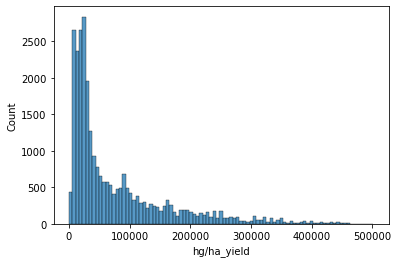

In [82]:
## Checking the data distribution in the yield column
sns.histplot(df_final, x = 'hg/ha_yield' )

<AxesSubplot:xlabel='Pesticides_tonnes', ylabel='Count'>

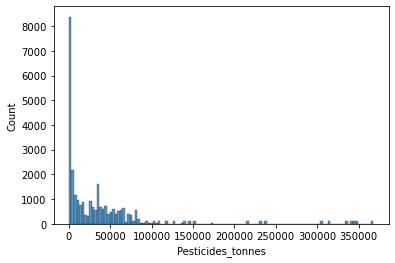

In [83]:
## Checking the data distribution in the Pesticides_tonnes column
sns.histplot(df_final, x = 'Pesticides_tonnes' )

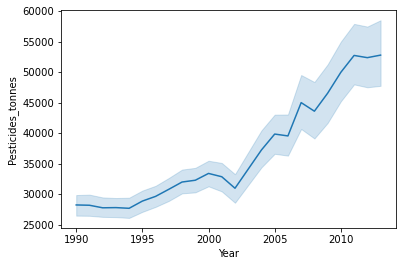

In [84]:
#visualization of how use of pesticides increased in years
df_final.groupby(['Year'])['Pesticides_tonnes'].sum() 
# draw lineplot
sns.lineplot(x = 'Year', y = 'Pesticides_tonnes', data = df_final)
plt.show()

In [85]:
# From the above plot we can infer that usage of pesticides has increased drastically over time.
# Lets check any impact on crop yield due to this increased pesticide usage with time. 

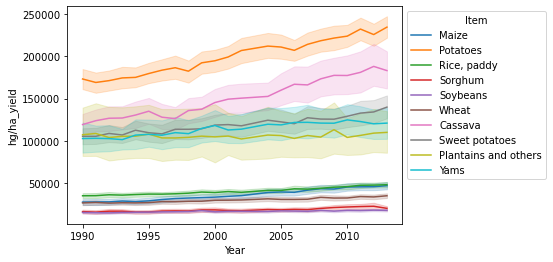

In [86]:
#visualization of use of pesticides over crops in years
df_final.groupby(['Item','Year'])['hg/ha_yield'].sum() 
# draw lineplot
ax = sns.lineplot(x = 'Year', y = 'hg/ha_yield', hue = 'Item', data = df_final)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [87]:
#It can be seen from the above plot that yield of potato has increased drastically followed by Cassava.

### Data Preprocessing

In [88]:
df_final.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,Pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [89]:
# Encoding Categorical Variables
from sklearn.preprocessing import OneHotEncoder

ohe = pd.get_dummies(df_final, columns=['Area','Item'], prefix=['Country', 'Item'])
ohe.head()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,Pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,1485.0,121.0,16.37,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,66667,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,23333,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,12500,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,7000,1485.0,121.0,16.37,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [90]:
# Getting predictors and target values
X = ohe.drop(['hg/ha_yield','Year'], axis=1)
y = ohe[['hg/ha_yield']]
column_names = X.columns

In [91]:
X

,average_rain_fall_mm_per_year,Pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1485.0,121.00,16.37,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1485.0,121.00,16.37,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1485.0,121.00,16.37,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1485.0,121.00,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1485.0,121.00,16.37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,657.0,2550.07,19.76,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
28238,657.0,2550.07,19.76,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
28239,657.0,2550.07,19.76,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
28240,657.0,2550.07,19.76,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [92]:
y

,hg/ha_yield
0,36613
1,66667
2,23333
3,12500
4,7000
...,...
28237,22581
28238,3066
28239,13142
28240,22222


In [93]:
#Feature Scaling 
# dataset set contains varying magnitudes, unit and range, hence need to bring it to same range

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(X)

In [94]:
X

array([[ 0.47329419, -0.61636612, -0.66106889, ..., -0.33763138,
        -0.39770719, -0.17583529],
       [ 0.47329419, -0.61636612, -0.66106889, ..., -0.33763138,
        -0.39770719, -0.17583529],
       [ 0.47329419, -0.61636612, -0.66106889, ..., -0.33763138,
        -0.39770719, -0.17583529],
       ...,
       [-0.69323228, -0.57585308, -0.12399147, ..., -0.33763138,
        -0.39770719, -0.17583529],
       [-0.69323228, -0.57585308, -0.12399147, ...,  2.96180998,
        -0.39770719, -0.17583529],
       [-0.69323228, -0.57585308, -0.12399147, ..., -0.33763138,
         2.51441269, -0.17583529]])

### Training Data

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [96]:
from sklearn.metrics import r2_score


def compare_models(model):

    model_name = model.__class__.__name__
    fit = model.fit(X_train,y_train)
    y_pred = fit.predict(X_test)
    r2 = r2_score(y_test,y_pred)
      
    return([model_name,r2])


In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    DecisionTreeRegressor(),
    LinearRegression()
]

In [98]:
model_train = list(map(compare_models,models)) 

In [99]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.8914765815582768]
['RandomForestRegressor', 0.6772466763007049]
['DecisionTreeRegressor', 0.9612464811981447]
['LinearRegression', 0.7482846602962454]


In [100]:
# From above we can infer that Decision Tree model is giving best accuracy.
# Lets compare with actual and predicted values

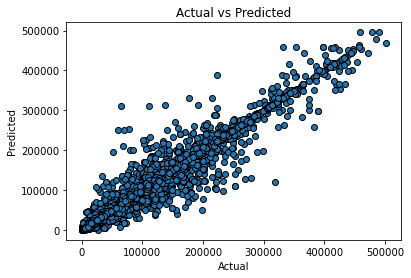

In [101]:
dt = DecisionTreeRegressor()  
model = dt.fit(X_train, y_train)  

features = dt.feature_importances_ #selecting important features

df_predict_actual = pd.DataFrame()
df_predict_actual["yield_predicted"] = model.predict(X_test)  
df_predict_actual["yield_actual"] = pd.DataFrame(y_test)["hg/ha_yield"].tolist()  

  
# So let's compare the model's actual values to its predictions.  
  
fig, ax = plt.subplots()  
  
ax.scatter(df_predict_actual["yield_actual"], df_predict_actual["yield_predicted"],edgecolors=(0, 0, 0))  
  
ax.set_xlabel('Actual')  
ax.set_ylabel('Predicted')  
ax.set_title("Actual vs Predicted")  
plt.show()  

                          feature  importance
0                   Item_Potatoes    0.371767
1                    Item_Cassava    0.102103
2             Item_Sweet potatoes    0.086392
3               Pesticides_tonnes    0.080646
4                   Country_India    0.059615
5                        avg_temp    0.054078
6   average_rain_fall_mm_per_year    0.035807
7                       Item_Yams    0.026612
8                   Country_Japan    0.022098
9               Country_Australia    0.018373
10         Country_United Kingdom    0.016939
11      Item_Plantains and others    0.016225
12                 Country_Canada    0.009167
13                Country_Ecuador    0.006627
14           Country_South Africa    0.006433


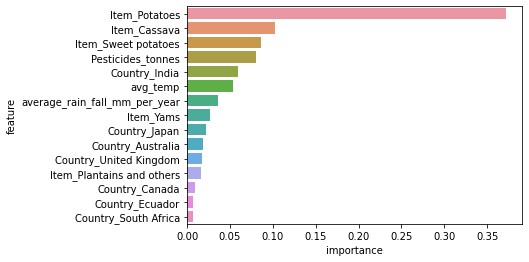

In [102]:
top_features = sorted(zip(column_names,features), key=lambda x: x[1], reverse=True) #zipping column names with features
features_df = pd.DataFrame(top_features[:15]) #making dataframe with the top 15 values
features_df.columns = ['feature', 'importance'] #renaming columns
print(features_df) #printing

#plotting of those top 15 featues 
sns.barplot(x = features_df['importance'],y = features_df['feature']);  


In [103]:
# Crop potatoes are having the highest importance in the decision making of yield-prediction. 
# The second important feature crop Cassava and sweet potatoes.
# Pesticides and temperature contribute in yield production.
#This makes sense, since those are highly produced crops that we observed earlier. 
# Overall, the assumption about these features seem correct with all of them are having impact on the expected crops yield in the model.